Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define Function and its gradient

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    return (x - 2)**4 + x**2 * y**2 + (y + 1)**2

def gradient(x, y):
    dx = 4 * (x - 2)**3 + 2 * x * y**2
    dy = 2 * x**2 * y + 2 * (y + 1)
    return np.array([dx, dy])

Vanilla Gradient descent

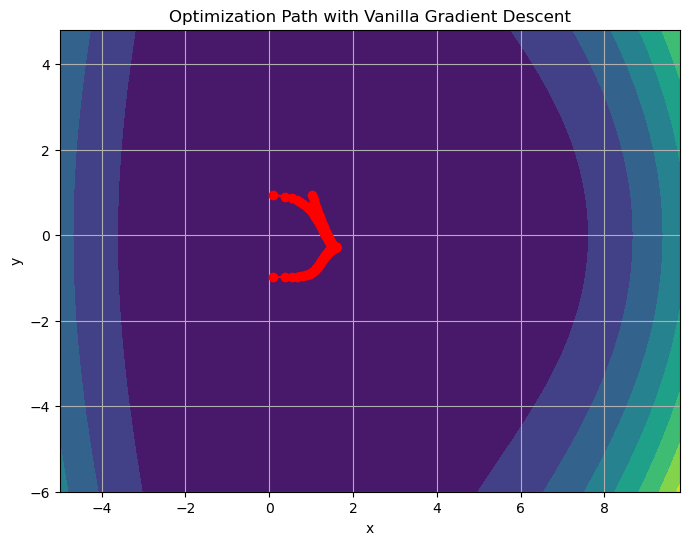

Iterations for initial point (1, 1): 811
Iterations for initial point (-1, 1): 824
Iterations for initial point (-1, -1): 881


In [4]:
def vanilla_gradient_descent(x, y, lr=0.01, max_iter=10000, tol=1e-6):
    history = []
    for i in range(max_iter):
        grad = gradient(x, y)
        x = x - lr * grad[0]
        y = y - lr * grad[1]
        history.append((x, y))
        if np.linalg.norm(grad) < tol:
            break
    return x, y, history, i + 1

# initial points
initial_points = [(1, 1), (-1, 1), (-1, -1)]

# optimization parameters
lr = 0.01
max_iter = 10000
tol = 1e-6

# vanilla gradient descent for each initial point
trajectories = []
iterations = []
for initial_point in initial_points:
    x_initial, y_initial = initial_point
    result_x, result_y, history, num_iterations = vanilla_gradient_descent(x_initial, y_initial, lr, max_iter, tol)
    trajectories.append(np.array(history))
    iterations.append(num_iterations)

# Visualization
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red')  # Plot the trajectory for each initial point
plt.title("Optimization Path with Vanilla Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Output number of iterations for each initial point
for i in range(len(initial_points)):
    print(f"Iterations for initial point {initial_points[i]}: {iterations[i]}")



Momentum Gradient descent

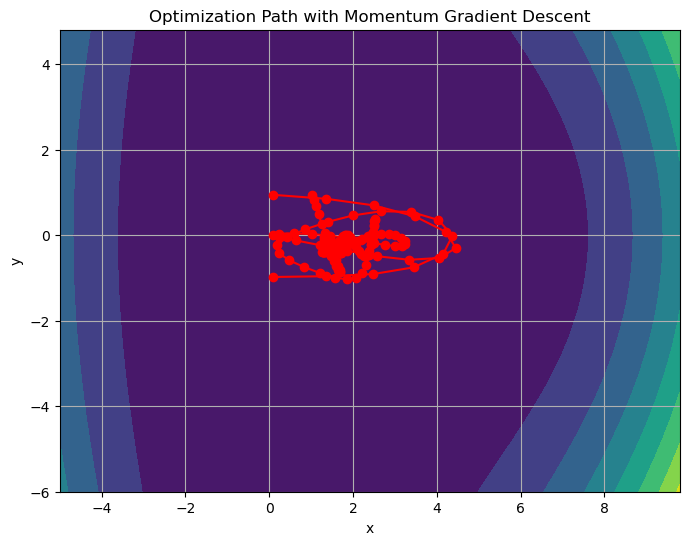

Iterations for initial point (1, 1): 254
Iterations for initial point (-1, 1): 284
Iterations for initial point (-1, -1): 299


In [5]:
def momentum_gradient_descent(x, y, lr=0.01, gamma=0.9, max_iter=10000, tol=1e-6):
    history = []
    v = np.array([0.0, 0.0])  # Initial velocity
    for i in range(max_iter):
        grad = gradient(x, y)
        v = gamma * v + lr * grad
        x = x - v[0]
        y = y - v[1]
        history.append((x, y))
        if np.linalg.norm(grad) < tol:
            break
    return x, y, history, i + 1

#  initial points
initial_points = [(1, 1), (-1, 1), (-1, -1)]

#  optimization parameters
lr = 0.01
gamma = 0.9
max_iter = 10000
tol = 1e-6

#  momentum gradient descent for each initial point
trajectories = []
iterations = []
for initial_point in initial_points:
    x_initial, y_initial = initial_point
    result_x, result_y, history, num_iterations = momentum_gradient_descent(x_initial, y_initial, lr, gamma, max_iter, tol)
    trajectories.append(np.array(history))
    iterations.append(num_iterations)

# Visualization
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red')  # Plot the trajectory for each initial point
plt.title("Optimization Path with Momentum Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Output number of iterations for each initial point
for i in range(len(initial_points)):
    print(f"Iterations for initial point {initial_points[i]}: {iterations[i]}")


Nesterov momentum Gradient descent

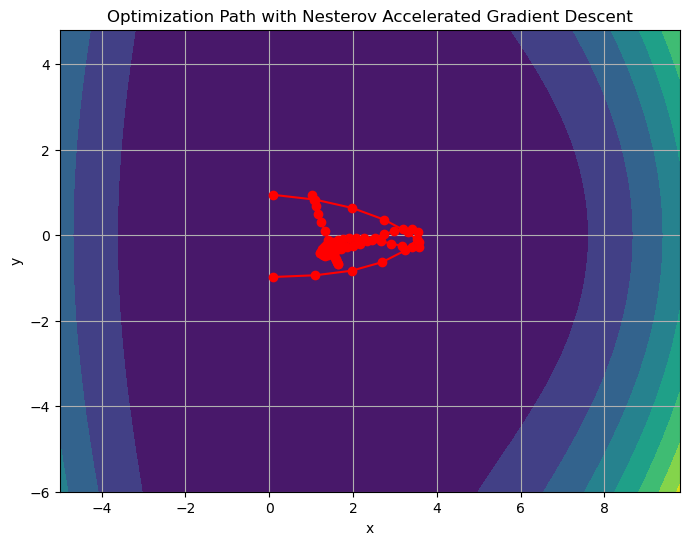

Iterations for initial point (1, 1): 176
Iterations for initial point (-1, 1): 213
Iterations for initial point (-1, -1): 184


In [7]:
def nesterov_gradient_descent(x, y, lr=0.01, gamma=0.9, max_iter=10000, tol=1e-6):
    history = []
    v = np.array([0.0, 0.0])  # Initial velocity
    num_iterations = 0
    for _ in range(max_iter):
        grad = gradient(x - gamma * v[0], y - gamma * v[1])  # Nesterov acceleration
        v = gamma * v + lr * grad
        x = x - v[0]
        y = y - v[1]
        history.append((x, y))
        num_iterations += 1
        if np.linalg.norm(grad) < tol:
            break
    return x, y, history, num_iterations

#  initial points
initial_points = [(1, 1), (-1, 1), (-1, -1)]

#  optimization parameters
lr = 0.01
gamma = 0.9
max_iter = 10000
tol = 1e-6

#  Nesterov accelerated gradient descent for each initial point
trajectories = []
iterations = []
for initial_point in initial_points:
    x_initial, y_initial = initial_point
    result_x, result_y, history, num_iterations = nesterov_gradient_descent(x_initial, y_initial, lr, gamma, max_iter, tol)
    trajectories.append(np.array(history))
    iterations.append(num_iterations)

# Visualization
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red')  # Plot the trajectory for each initial point
plt.title("Optimization Path with Nesterov Accelerated Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Output number of iterations for each initial point
for i in range(len(initial_points)):
    print(f"Iterations for initial point {initial_points[i]}: {iterations[i]}")


Adagrad

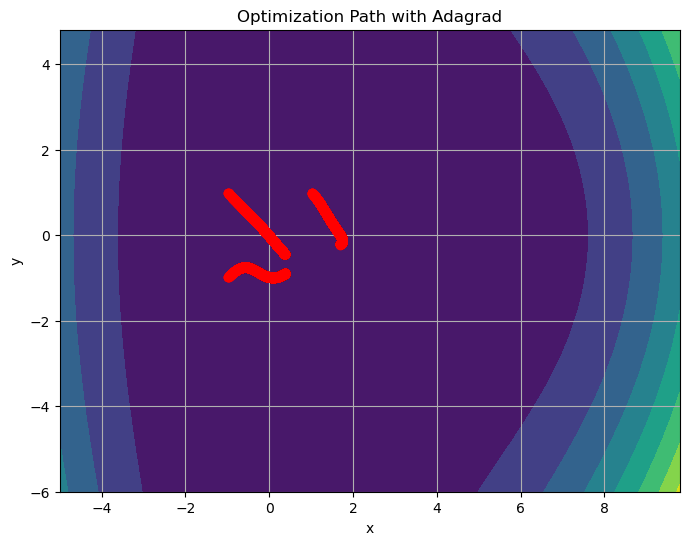

Iterations for initial point (1, 1): 10000
Iterations for initial point (-1, 1): 10000
Iterations for initial point (-1, -1): 10000


In [8]:
def adagrad(x, y, lr=0.01, max_iter=10000, tol=1e-6):
    history = []
    grad_squared_sum = np.zeros(2)
    num_iterations = 0
    for _ in range(max_iter):
        grad = gradient(x, y)
        grad_squared_sum += grad**2
        adjusted_lr = lr / np.sqrt(grad_squared_sum + 1e-8)  # Add small constant to avoid division by zero
        x = x - adjusted_lr[0] * grad[0]
        y = y - adjusted_lr[1] * grad[1]
        history.append((x, y))
        num_iterations += 1
        if np.linalg.norm(grad) < tol:
            break
    return x, y, history, num_iterations

#  initial points
initial_points = [(1, 1), (-1, 1), (-1, -1)]

#  optimization parameters
lr = 0.01
max_iter = 10000
tol = 1e-6

#  Adagrad for each initial point
trajectories = []
iterations = []
for initial_point in initial_points:
    x_initial, y_initial = initial_point
    result_x, result_y, history, num_iterations = adagrad(x_initial, y_initial, lr, max_iter, tol)
    trajectories.append(np.array(history))
    iterations.append(num_iterations)

# Visualization
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red')  # Plot the trajectory for each initial point
plt.title("Optimization Path with Adagrad")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Output number of iterations for each initial point
for i in range(len(initial_points)):
    print(f"Iterations for initial point {initial_points[i]}: {iterations[i]}")


RMS propogation

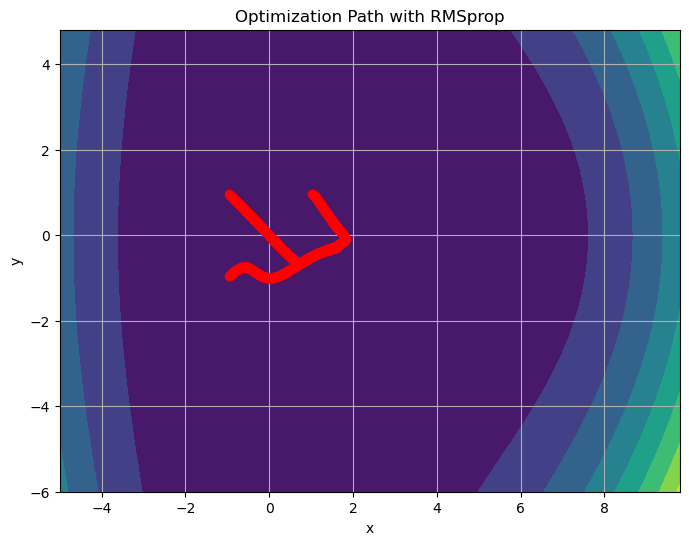

Iterations for initial point (1, 1): 10000
Iterations for initial point (-1, 1): 10000
Iterations for initial point (-1, -1): 10000


In [9]:
def rmsprop(x, y, lr=0.01, gamma=0.9, epsilon=1e-8, max_iter=10000, tol=1e-6):
    history = []
    squared_grad_avg = np.zeros(2)
    num_iterations = 0
    for _ in range(max_iter):
        grad = gradient(x, y)
        squared_grad_avg = gamma * squared_grad_avg + (1 - gamma) * grad**2
        adjusted_lr = lr / np.sqrt(squared_grad_avg + epsilon)
        x = x - adjusted_lr[0] * grad[0]
        y = y - adjusted_lr[1] * grad[1]
        history.append((x, y))
        num_iterations += 1
        if np.linalg.norm(grad) < tol:
            break
    return x, y, history, num_iterations

# initial points
initial_points = [(1, 1), (-1, 1), (-1, -1)]

#  optimization parameters
lr = 0.01
gamma = 0.9
epsilon = 1e-8
max_iter = 10000
tol = 1e-6

#  RMS prop for each initial point
trajectories = []
iterations = []
for initial_point in initial_points:
    x_initial, y_initial = initial_point
    result_x, result_y, history, num_iterations = rmsprop(x_initial, y_initial, lr, gamma, epsilon, max_iter, tol)
    trajectories.append(np.array(history))
    iterations.append(num_iterations)

# Visualization
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red')  # Plot the trajectory for each initial point
plt.title("Optimization Path with RMSprop")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Output number of iterations for each initial point
for i in range(len(initial_points)):
    print(f"Iterations for initial point {initial_points[i]}: {iterations[i]}")


ADAM

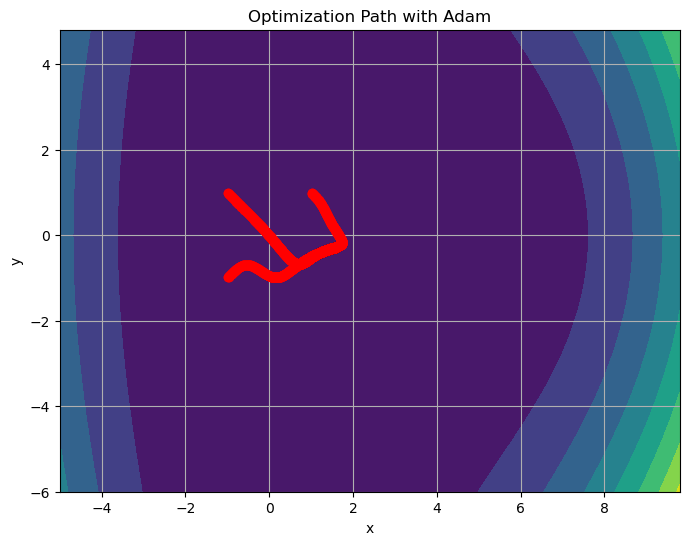

Iterations for initial point (1, 1): 625
Iterations for initial point (-1, 1): 4888
Iterations for initial point (-1, -1): 4884


In [10]:
def adam(x, y, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=10000, tol=1e-6):
    history = []
    m = np.zeros(2)  # Initialize 1st moment vector
    v = np.zeros(2)  # Initialize 2nd moment vector
    num_iterations = 0
    for _ in range(max_iter):
        grad = gradient(x, y)
        m = beta1 * m + (1 - beta1) * grad  # Update biased first moment estimate
        v = beta2 * v + (1 - beta2) * grad**2  # Update biased second raw moment estimate
        m_hat = m / (1 - beta1**(num_iterations + 1))  # Correct bias in first moment
        v_hat = v / (1 - beta2**(num_iterations + 1))  # Correct bias in second moment
        adjusted_lr = lr / (np.sqrt(v_hat) + epsilon)
        x = x - adjusted_lr[0] * m_hat[0]
        y = y - adjusted_lr[1] * m_hat[1]
        history.append((x, y))
        num_iterations += 1
        if np.linalg.norm(grad) < tol:
            break
    return x, y, history, num_iterations

# initial points
initial_points = [(1, 1), (-1, 1), (-1, -1)]

# optimization parameters
lr = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
max_iter = 10000
tol = 1e-6

# Adam for each initial point
trajectories = []
iterations = []
for initial_point in initial_points:
    x_initial, y_initial = initial_point
    result_x, result_y, history, num_iterations = adam(x_initial, y_initial, lr, beta1, beta2, epsilon, max_iter, tol)
    trajectories.append(np.array(history))
    iterations.append(num_iterations)

# Visualization
X, Y = np.meshgrid(np.arange(-5, 10, 0.2), np.arange(-6, 5, 0.2))
Z = objective_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
for trajectory in trajectories:
    plt.plot(trajectory[:, 0], trajectory[:, 1], '-o', color='red')  # Plot the trajectory for each initial point
plt.title("Optimization Path with Adam")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Output number of iterations for each initial point
for i in range(len(initial_points)):
    print(f"Iterations for initial point {initial_points[i]}: {iterations[i]}")
